In [20]:
import pandas as pd
import awkward as ak
import hist
from hist import Hist
import mplhep as hep
import matplotlib.pyplot as plt
import numpy as np

In [21]:
def mean_sigma(_hist):
    x_values = _hist.axes[0].centers
    hist_values = _hist.values()

    # gaussian with reasonable initial guesses for parameters
    # constant = float(hist_values.max())
    mean = (hist_values * x_values).sum() / hist_values.sum()
    sigma = (hist_values * np.square(x_values - mean)).sum() / hist_values.sum()

    return mean, sigma


In [30]:
def plotting(_hist):
    f, ax = plt.subplots(figsize=(10, 10))
    xaxis_edges = _hist.axes.edges[0]
    mean, sigma = mean_sigma(_hist)
    plt.style.use(hep.style.CMS)
    _hist.plot()
    plt.ylabel("Events")
    plt.xlim(xaxis_edges[0],xaxis_edges[-1])
    plt.text(0.4, 0.7, """
                Entries: {} 
                Mean: {}
                RMS: {}
                """.format(
                    int(_hist.sum()),
                    np.round(mean,4),
                    np.round(sigma,4)
                ),
                transform=ax.transAxes
            )
    # plt.yscale("log")

In [7]:
rpc=pd.read_csv("rpc.csv")
irpc=pd.read_csv("irpc.csv")

## RPC

In [8]:
rpc.agg(
    {
        "tdc_idx": ["min", "max", "median", "mean"],
        "sign": ["min", "max", "median", "mean"],
        "BX": ["min", "max", "median", "mean"],
        "SBX": ["min", "max", "median", "mean"],
        "time": ["min", "max", "median", "mean"],
        "tcalc": ["min", "max", "median", "mean"],
        "time-tcale": ["min", "max", "median", "mean"],
    }
)

tdc_idx      sign        BX        SBX        time       tcalc  \
min     0.000000 -1.000000  0.000000   0.000000  -13.942900  -12.500000   
max     2.000000  1.000000  7.000000  19.000000  211.112000  210.000000   
median  0.000000  1.000000  0.000000   5.000000   -0.181874    0.000000   
mean    0.325318  0.062209  0.003491   4.789792   -0.521063   -0.438256   

        time-tcale  
min      -2.499510  
max       2.499990  
median   -0.107806  
mean     -0.082807

In [9]:
nbins=20
hists = {
    "tdc_idx": Hist.new.Regular(4, 0, 4, name="x", label="tdc_idx").Double(),
    "sign": Hist.new.Regular(4, -2, 2, name="x", label="sign").Double(),
    "BX": Hist.new.Regular(20, -10, 10, name="x", label="BX").Double(),
    "SBX": Hist.new.Regular(10, 0, 10, name="x", label="SBX").Double(),
    "time": Hist.new.Regular(20, -15, 50, name="x", label="time").Double(),
    "tcalc": Hist.new.Regular(20, -15, 50, name="x", label="tcalc").Double(),
    "time-tcale": Hist.new.Regular(20, -10, 10, name="x", label=r"$\Delta$T (ns)").Double()
}

In [11]:
for i in rpc.keys():
    hists[i].fill(rpc[i])

### RPC plots

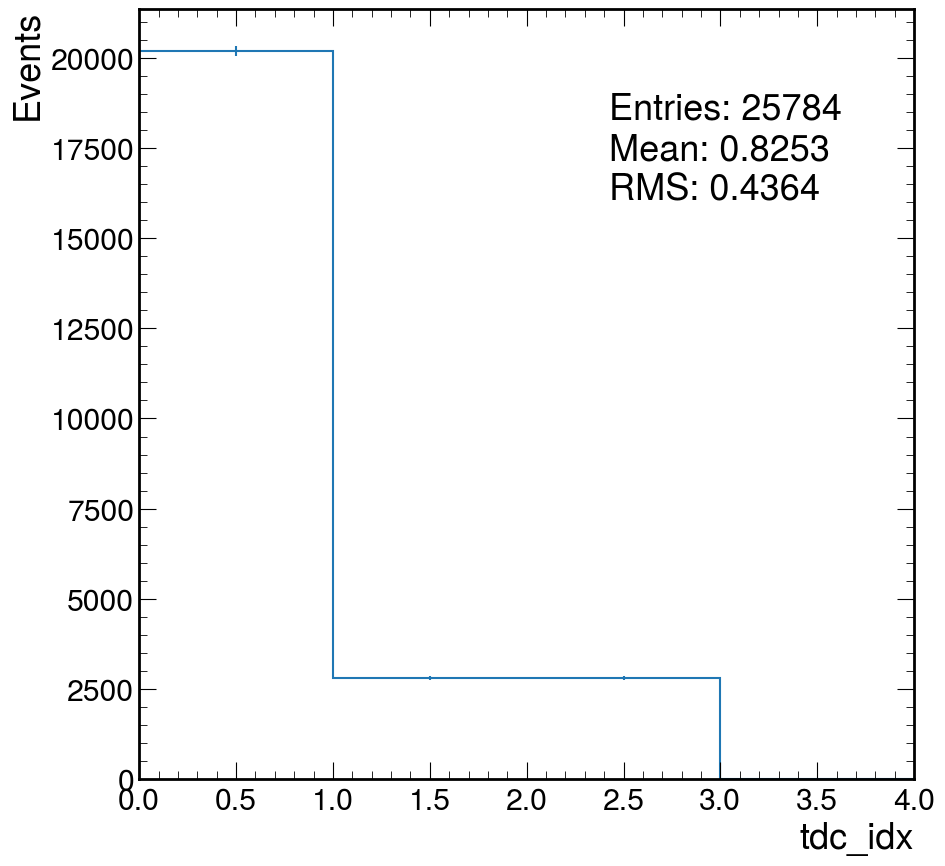

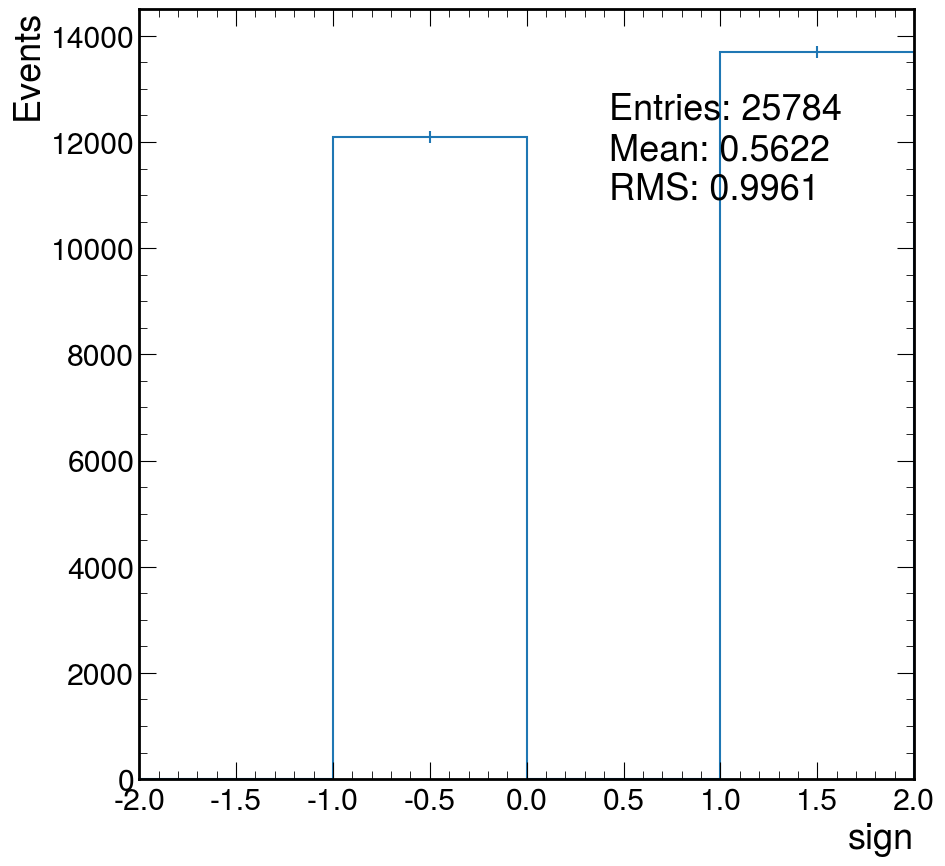

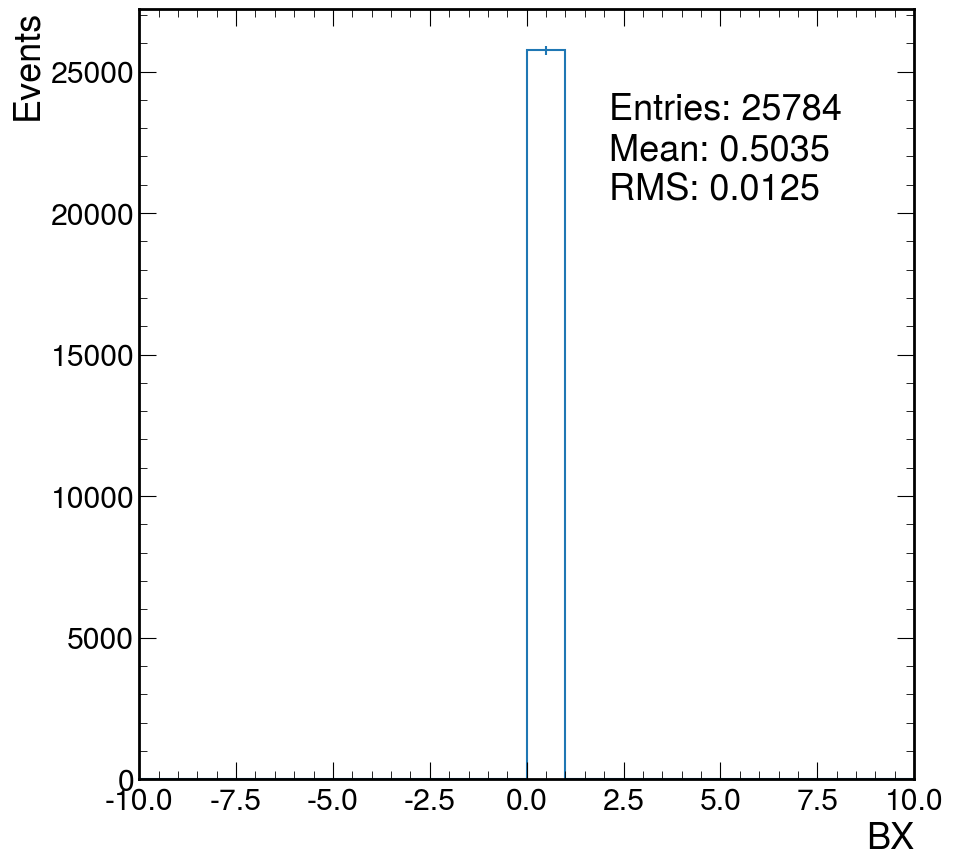

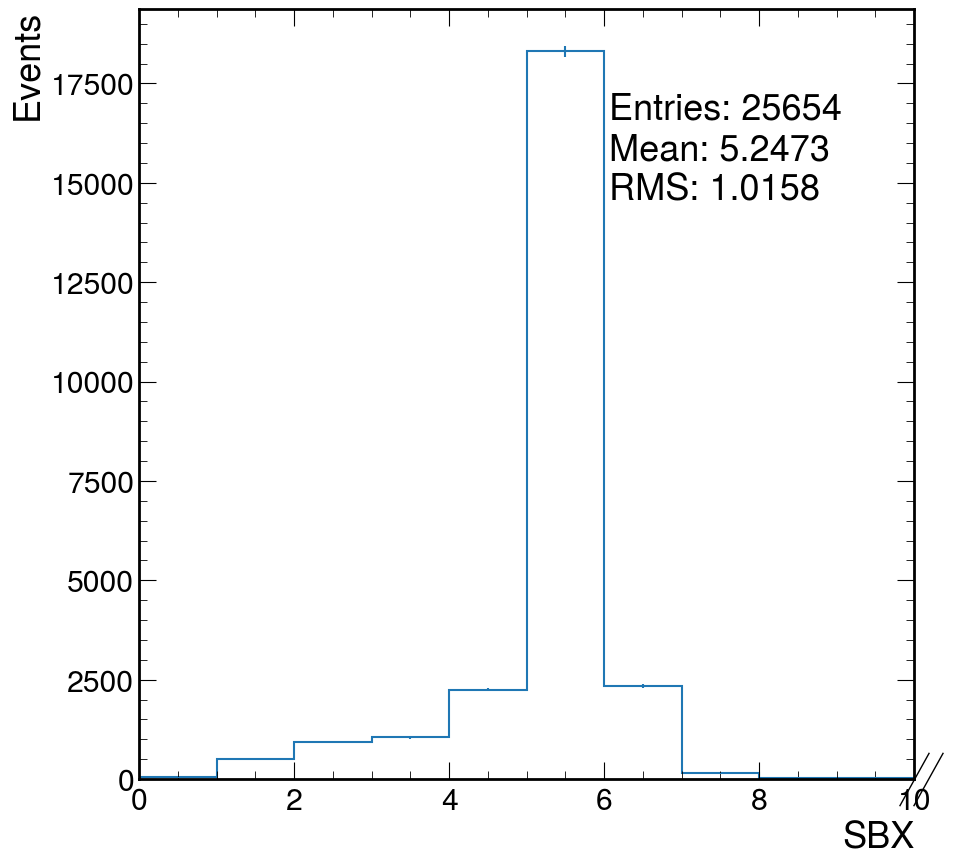

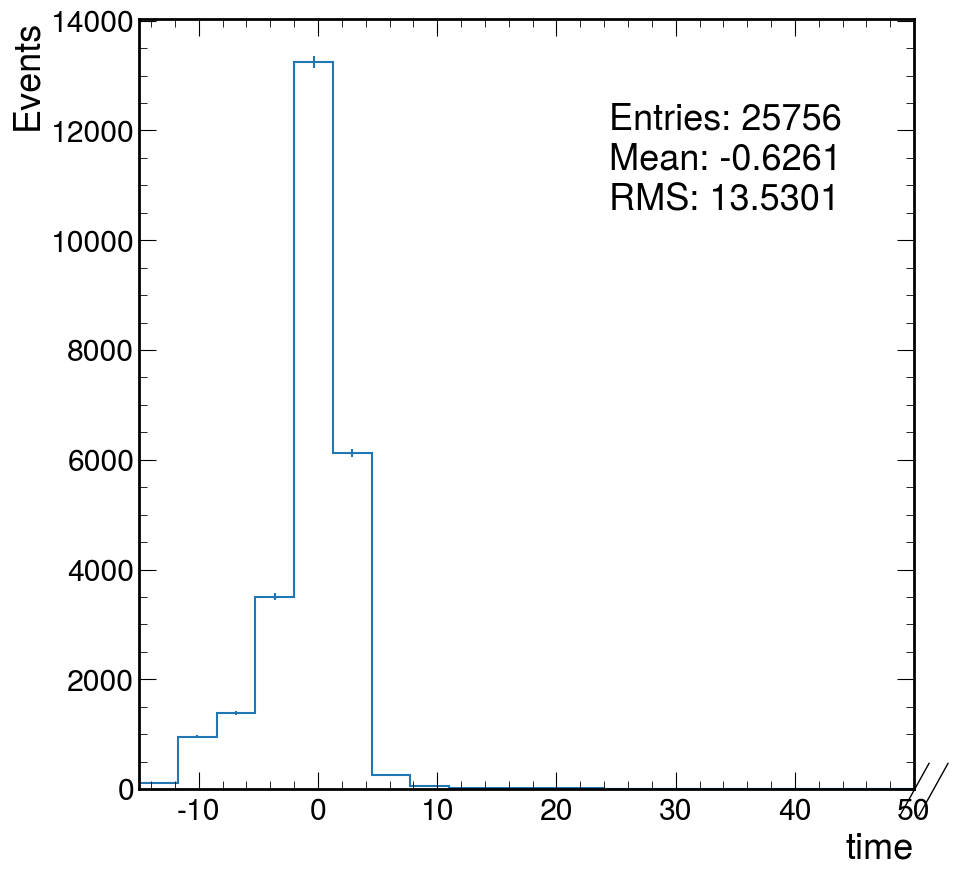

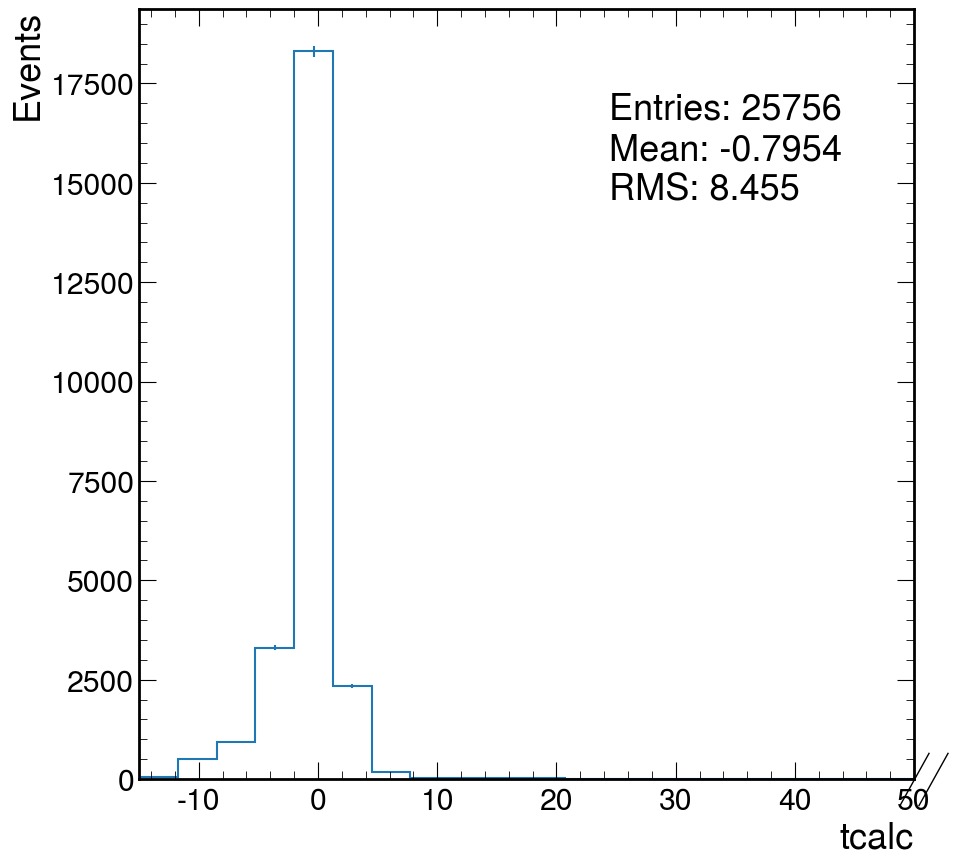

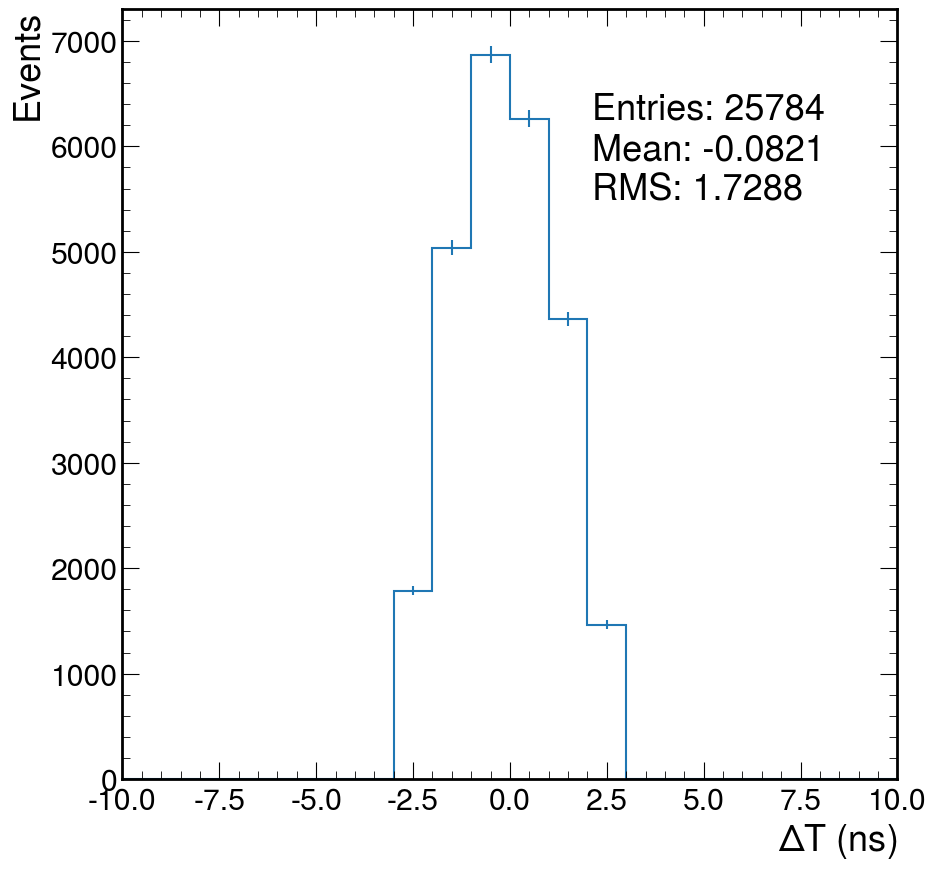

In [31]:
for i in hists:
    plotting(hists[i])

## iRPC

In [37]:
irpc["AvrageT"]=(irpc["fine_time_first"]+irpc["fine_time_second"])/2

irpc.agg(
    {
        "i": ["min", "max", "median", "mean"],
        "tdc1_first": ["min", "max", "median", "mean"],
        "tdc1_second": ["min", "max", "median", "mean"],
        "tdc2_first": ["min", "max", "median", "mean"],
        "tdc2_second": ["min", "max", "median", "mean"],
        "fine_time_first": ["min", "max", "median", "mean"],
        "fine_time_second": ["min", "max", "median", "mean"],
        "roll_id": ["min", "max", "median", "mean"],
        "AvrageT": ["min", "max", "median", "mean"],
    }
)

i  tdc1_first  tdc1_second  tdc2_first  tdc2_second  \
min      1.000000    0.000000      3.00000    0.000000     0.000000   
max     96.000000    3.000000     17.00000    3.000000    14.000000   
median  48.000000    0.000000      5.00000    0.000000     2.000000   
mean    48.927015    0.007262      5.04793    0.007262     2.428468   

        fine_time_first  fine_time_second       roll_id     AvrageT  
min          -18.000000        -11.000000  6.375670e+08  342.000000  
max          834.000000        845.000000  6.375759e+08  440.500000  
median       429.000000        348.500000  6.375714e+08  404.000000  
mean         419.617647        362.514887  6.375716e+08  391.066267

In [40]:
nbins=20
hists_irpc = {
    "i": Hist.new.Regular(20, 0, 100, name="x", label="i").Double(),
    "tdc1_first": Hist.new.Regular(20, -10, 10, name="x", label="BX[TDC1]").Double(),
    "tdc1_second": Hist.new.Regular(10, 0, 10, name="x", label="SBX[TDC1]").Double(),
    "tdc2_first": Hist.new.Regular(20, -10, 10, name="x", label="BX[TDC2]").Double(),
    "tdc2_second": Hist.new.Regular(10, 0, 10, name="x", label="SBX[TDC2]").Double(),
    "fine_time_first": Hist.new.Regular(20, -15, 850, name="x", label="$t_{TDC1}$ (ns)").Double(),
    "fine_time_second": Hist.new.Regular(20, -10, 850, name="x", label="$t_{TDC2}$ (ns)").Double(),
    "roll_id": Hist.new.Regular(89, 637575670, 637575759, name="x", label="roll_id").Double(),
    "AvrageT": Hist.new.Regular(20, 320, 450, name="x", label="AvrageTime($(t_{TDC1}+t_{TDC2})/2$) (ns)").Double(),
}

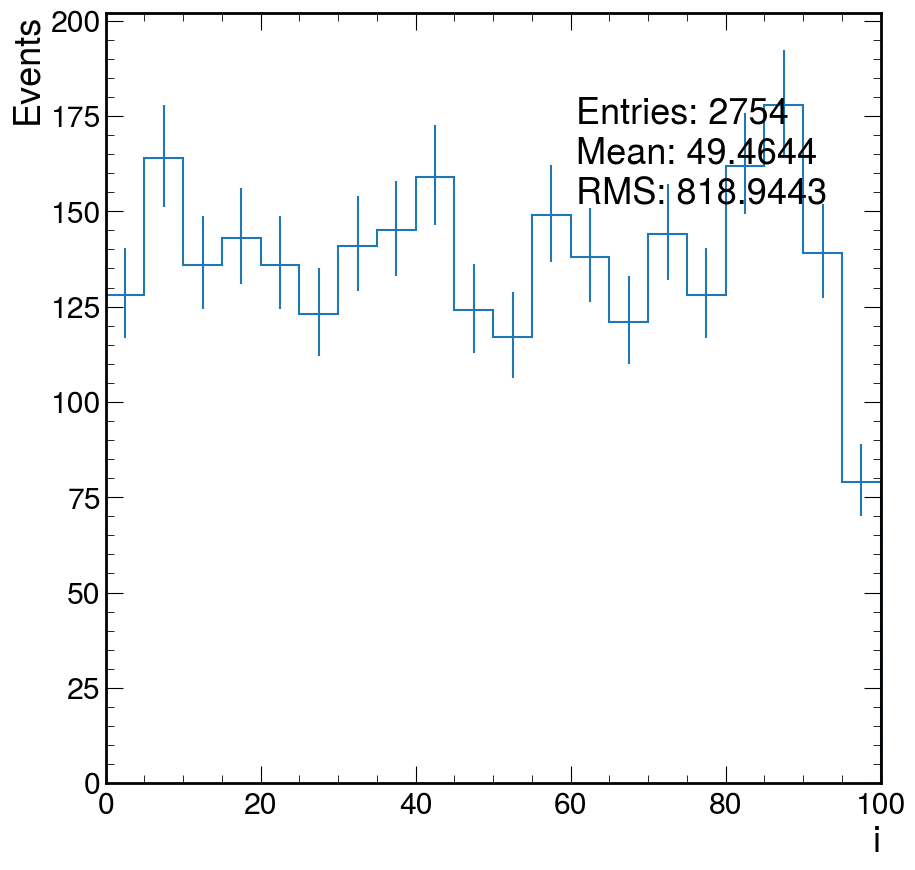

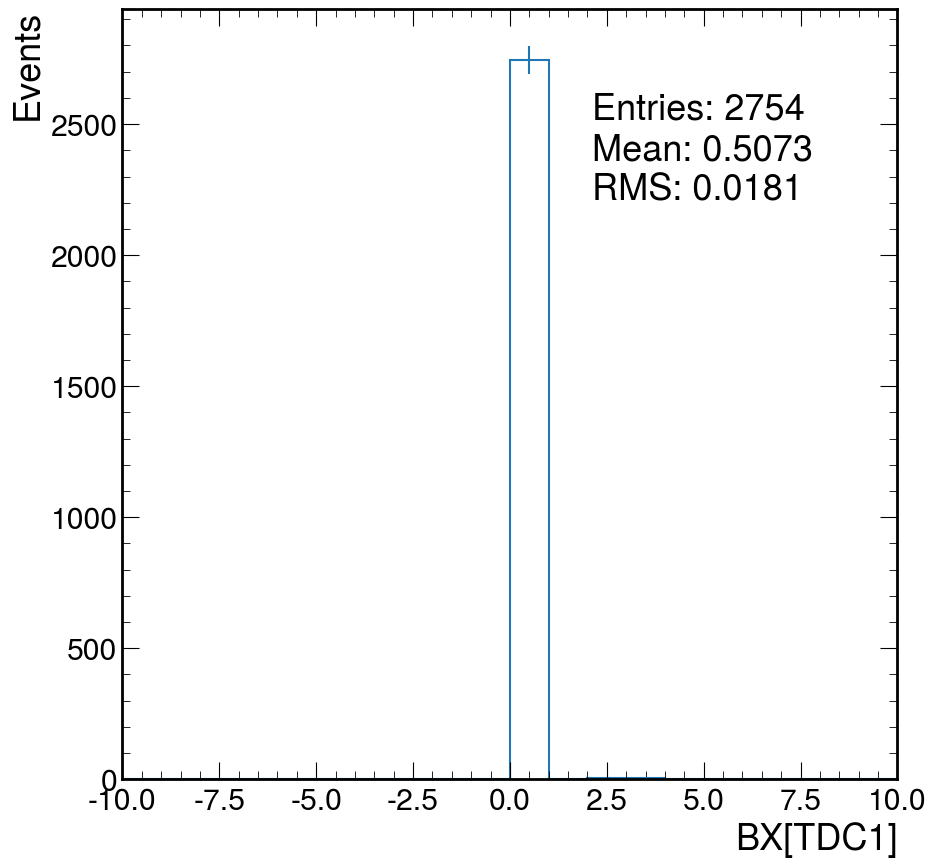

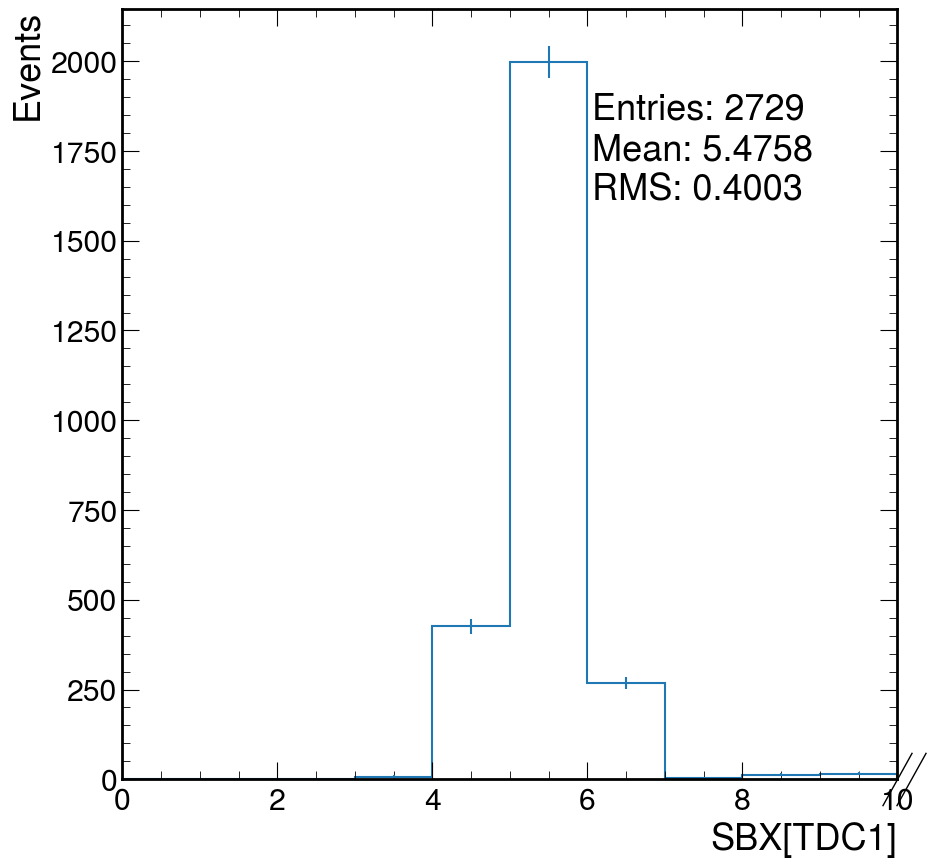

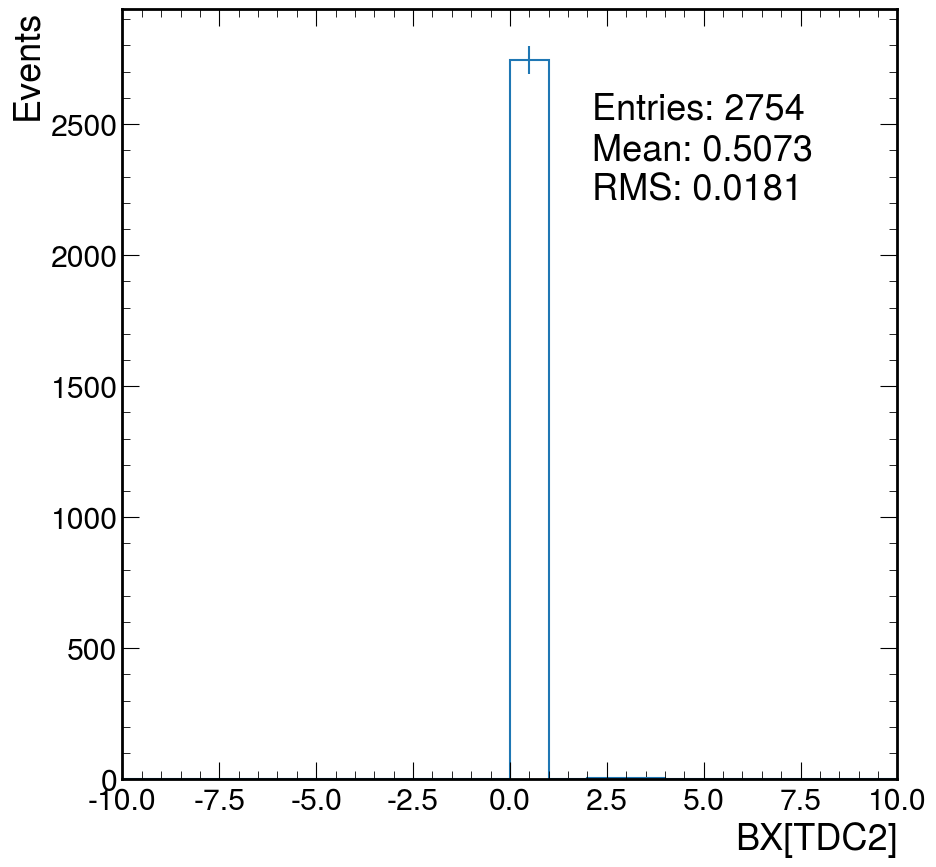

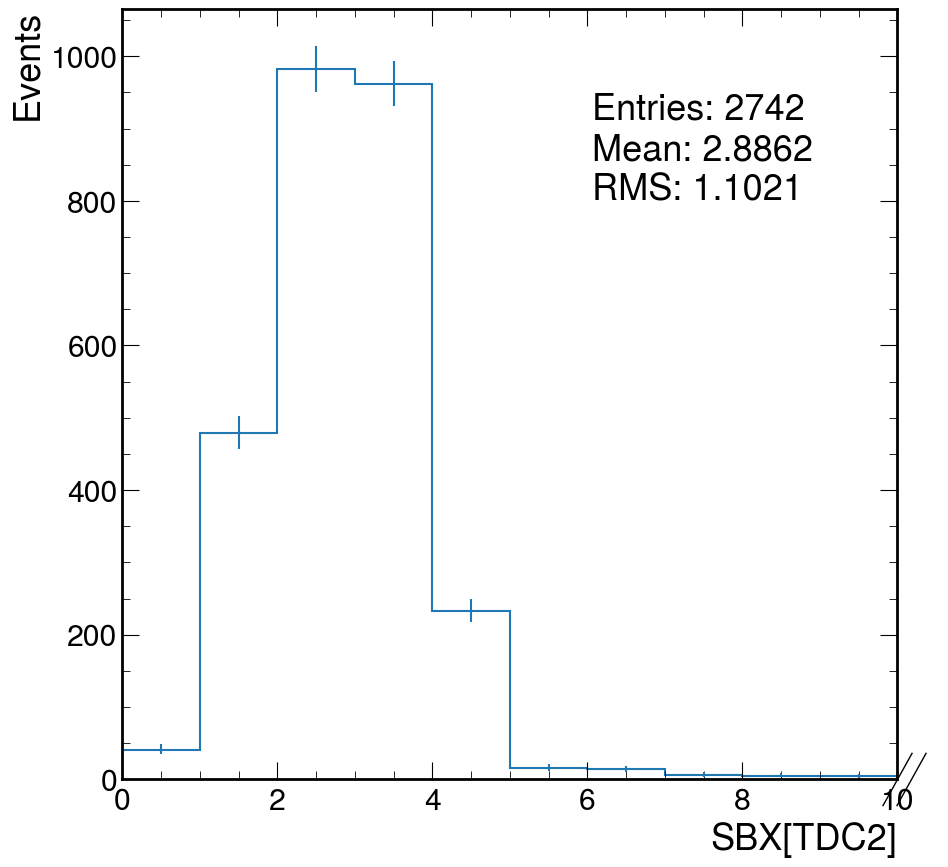

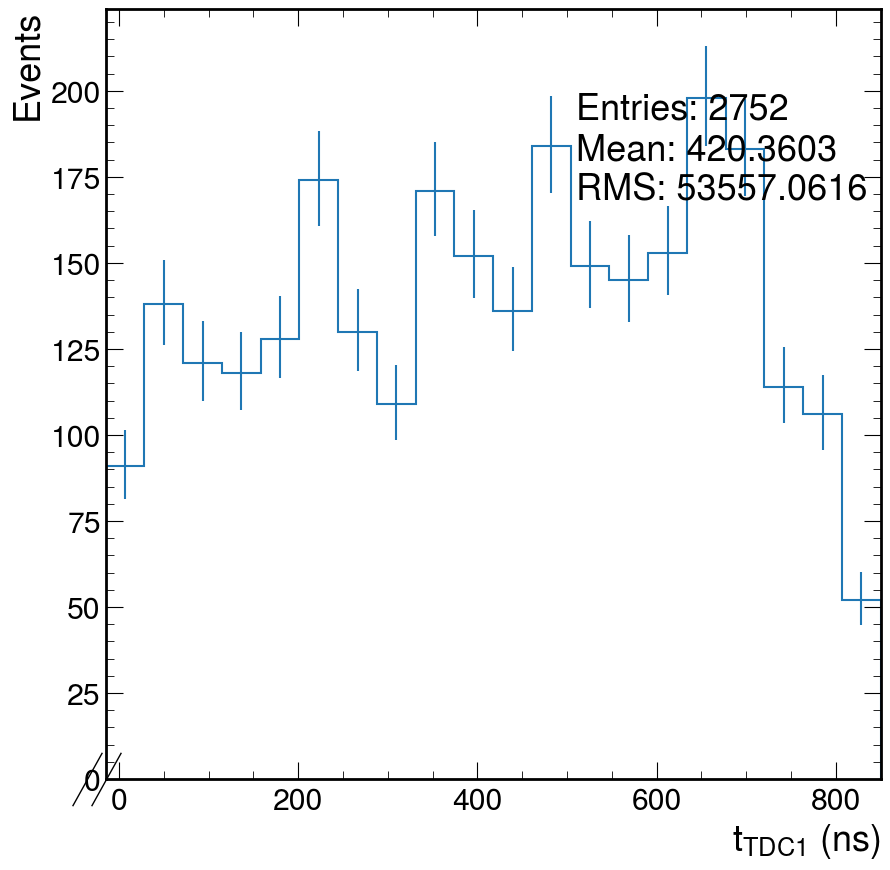

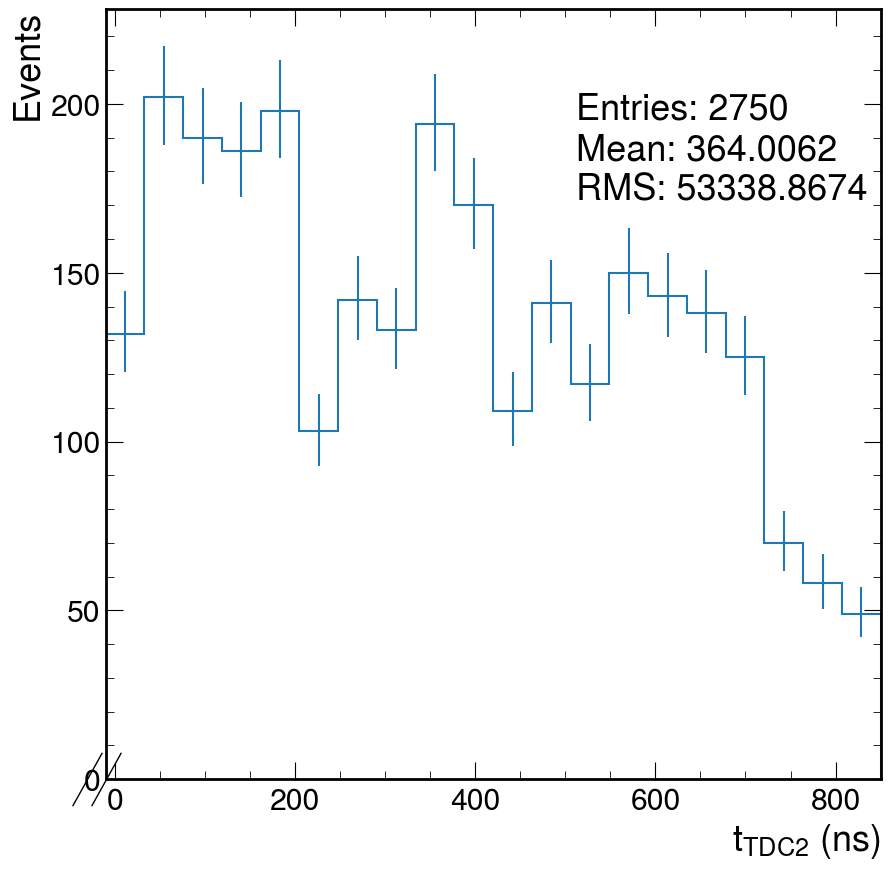

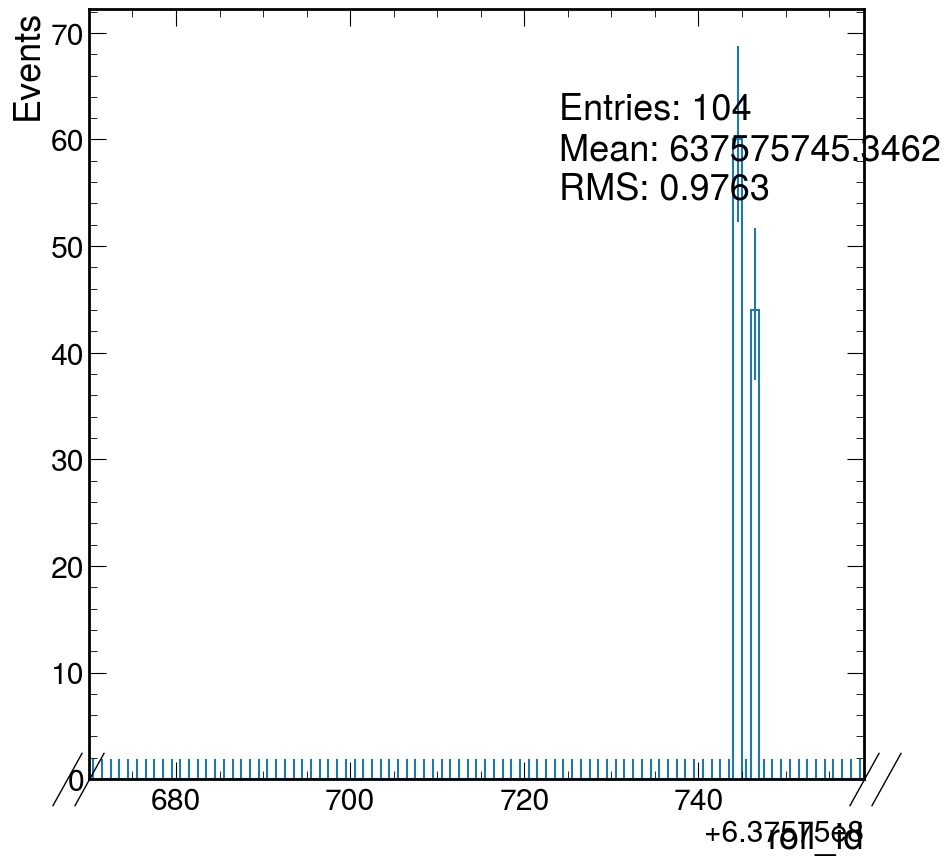

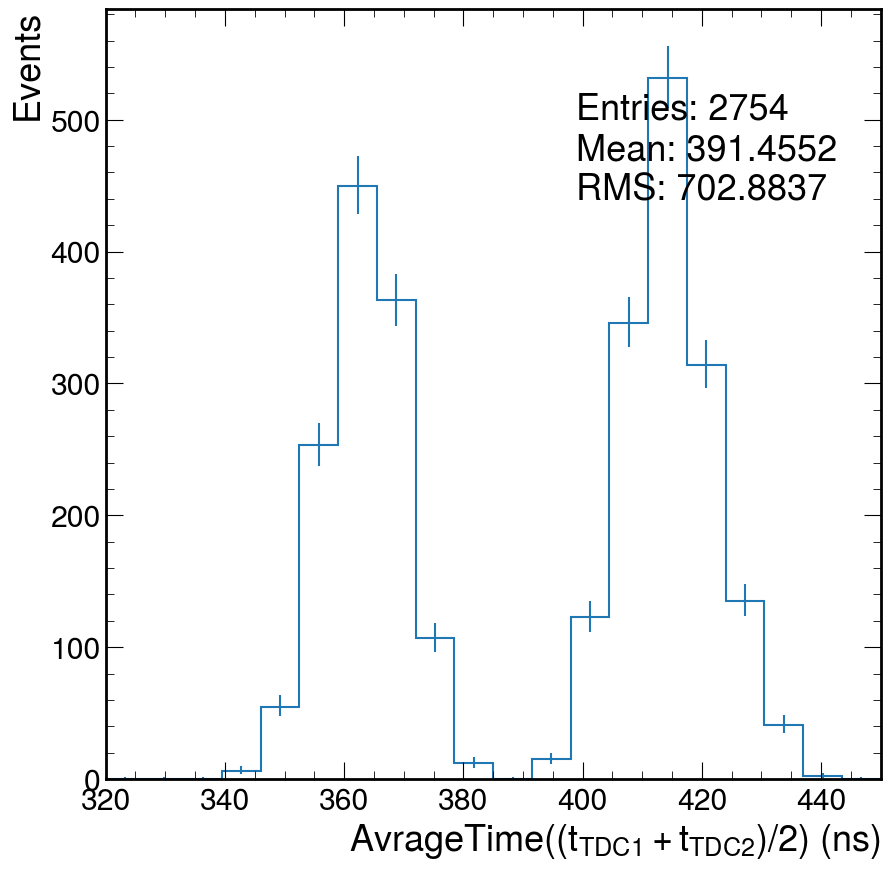

In [41]:
for i in hists_irpc:
    hists_irpc[i].fill(irpc[i])

for i in hists_irpc:
    plotting(hists_irpc[i])